# Interferometric intensity constraint
 - a reflection dataset measusred with a USAF resolution target at 700 nm.

In [1]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import h5py

In [2]:
# import the PtyLab module
import PtyLab
from PtyLab import ExperimentalData
from PtyLab import Reconstruction
from PtyLab import Monitor
from PtyLab import Params
from PtyLab import Engines
from PtyLab.utils.utils import posit

In [3]:
## Download the data from online(), 

# set your data folder as fileFolder 
fileFolder = Path(r"D:\Du\InternalWorkshop\Scripts\NIR90reflection\ComparisonUSAF")

fileName = "USAF_speckle_bin4.hdf5"
filePath = Path.joinpath(fileFolder,fileName)

In [4]:

experimentalData = ExperimentalData(filePath, operationMode='CPM')
experimentalData.zo = 25.02e-3
experimentalData.entrancePupilDiameter = 0.4e-3  #exampleData.Np / 3 * exampleData.dxp  # initial estimate of beam size
backgroundOffset = 20
experimentalData.ptychogram = posit(experimentalData.ptychogram-backgroundOffset)
experimentalData.showPtychogram()

Maximum count in ptychogram is 16202


In [5]:
reconstruction = Reconstruction(experimentalData)
reconstruction.No = 2**11
reconstruction.initialProbe = 'circ'
reconstruction.initialObject = 'ones'
# initialize probe and object and related params
reconstruction.initializeObjectProbe()

# customize initial probe quadratic phase
reconstruction.probe = reconstruction.probe*np.exp(1.j*2*np.pi/reconstruction.wavelength *
                                             (reconstruction.Xp**2+reconstruction.Yp**2)/(3*6e-3))

In [6]:
# Set monitor properties
monitor = Monitor()
monitor.figureUpdateFrequency = 1
monitor.objectPlot = 'complex'  # complex abs angle
monitor.verboseLevel = 'high'  # high: plot two figures, low: plot only one figure
monitor.probeZoom = 1  # control probe plot FoV
monitor.objectZoom = 2   # control object plot FoV
monitor.objectContrast = 0.8
monitor.probeContrast = 0.5

In [7]:
params = Params()
## switches
params.gpuSwitch = True
params.positionOrder = 'random'  # 'sequential' or 'random'
params.propagator = 'Fraunhofer'  # Fraunhofer Fresnel ASP scaledASP polychromeASP scaledPolychromeASP
params.probePowerCorrectionSwitch = True
params.comStabilizationSwitch = True
params.fftshiftSwitch = False
params.backgroundModeSwitch = True

d:\du\workshop\PtyLab\PtyLab\Engines\BaseEngine.py:293: UserWarning: fftshiftSwitch set to false, this may lead to reduced performance
  warnings.warn('fftshiftSwitch set to false, this may lead to reduced performance')


<IPython.core.display.Javascript object>


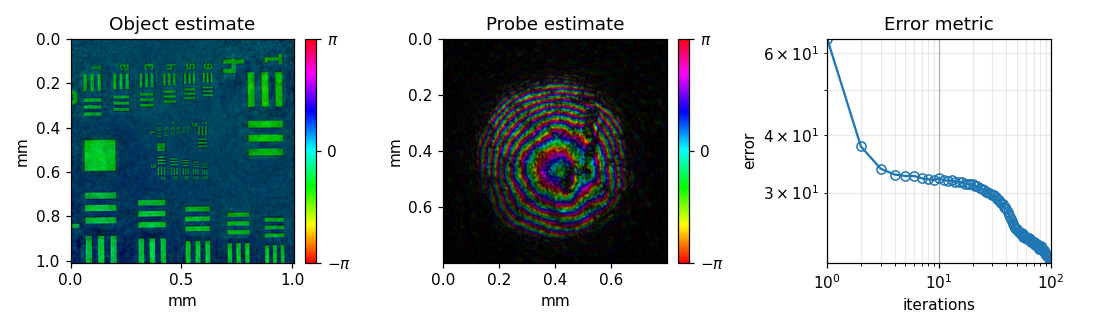

<IPython.core.display.Javascript object>


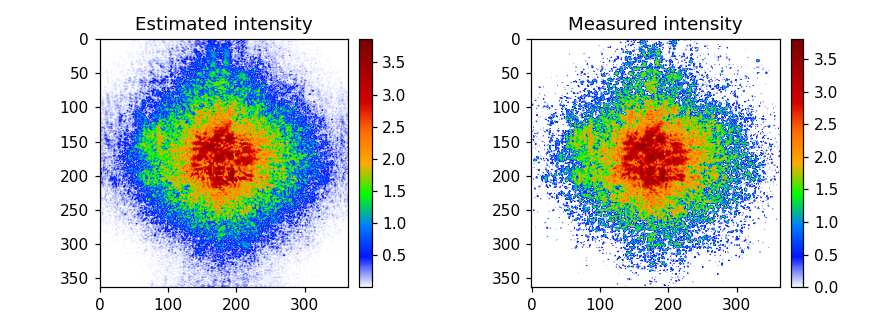

                                                                                                                       
iteration: 0                                                                                                           
error: 64.5                                                                                                            
estimated linear overlap: 74.1 %                                                                                       
estimated area overlap: 54.4 %                                                                                         
                                                                                                                       
iteration: 1                                                                                                           
error: 37.7                                                                                                            
estimated linear overlap: 73.8 %        

estimated linear overlap: 74.8 %                                                                                       
estimated area overlap: 64.7 %                                                                                         
                                                                                                                       
iteration: 14                                                                                                          
error: 31.7                                                                                                            
estimated linear overlap: 75.0 %                                                                                       
estimated area overlap: 65.4 %                                                                                         
                                                                                                                       
iteration: 15                           

iteration: 27                                                                                                          
error: 30.0                                                                                                            
estimated linear overlap: 76.2 %                                                                                       
estimated area overlap: 73.8 %                                                                                         
                                                                                                                       
iteration: 28                                                                                                          
error: 29.8                                                                                                            
estimated linear overlap: 76.4 %                                                                                       
estimated area overlap: 74.4 %          

estimated area overlap: 78.9 %                                                                                         
                                                                                                                       
iteration: 41                                                                                                          
error: 26.9                                                                                                            
estimated linear overlap: 77.0 %                                                                                       
estimated area overlap: 79.1 %                                                                                         
                                                                                                                       
iteration: 42                                                                                                          
error: 26.6                             

error: 24.5                                                                                                            
estimated linear overlap: 76.3 %                                                                                       
estimated area overlap: 78.0 %                                                                                         
                                                                                                                       
iteration: 55                                                                                                          
error: 24.0                                                                                                            
estimated linear overlap: 76.3 %                                                                                       
estimated area overlap: 78.0 %                                                                                         
                                        

                                                                                                                       
iteration: 68                                                                                                          
error: 23.4                                                                                                            
estimated linear overlap: 75.9 %                                                                                       
estimated area overlap: 78.1 %                                                                                         
                                                                                                                       
iteration: 69                                                                                                          
error: 23.5                                                                                                            
estimated linear overlap: 75.8 %        

estimated linear overlap: 75.3 %                                                                                       
estimated area overlap: 78.0 %                                                                                         
                                                                                                                       
iteration: 82                                                                                                          
error: 22.5                                                                                                            
estimated linear overlap: 75.3 %                                                                                       
estimated area overlap: 77.9 %                                                                                         
                                                                                                                       
iteration: 83                           

iteration: 95                                                                                                          
error: 21.8                                                                                                            
estimated linear overlap: 74.6 %                                                                                       
estimated area overlap: 77.5 %                                                                                         
                                                                                                                       
iteration: 96                                                                                                          
error: 21.6                                                                                                            
estimated linear overlap: 74.6 %                                                                                       
estimated area overlap: 77.5 %          

In [8]:
# We first use standard intensityConstraint
params.intensityConstraint = 'standard'  

mPIE = Engines.mPIE(reconstruction, experimentalData, params, monitor)
mPIE.numIterations = 100
mPIE.betaProbe = 0.05
mPIE.betaObject = 0.25
mPIE.reconstruct()

<IPython.core.display.Javascript object>


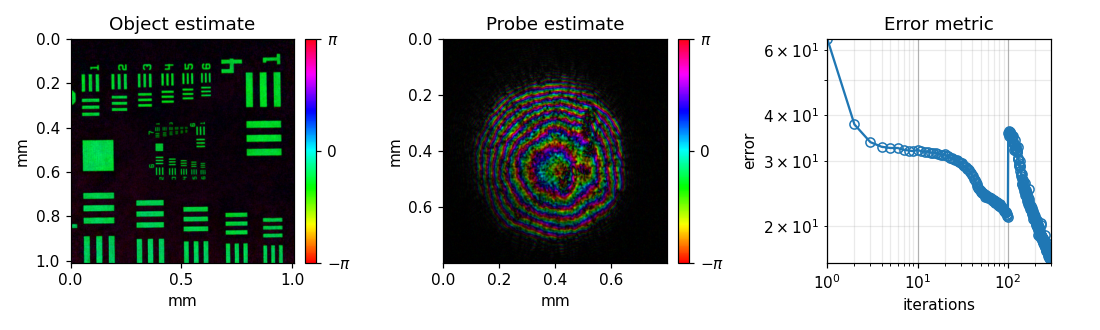

<IPython.core.display.Javascript object>


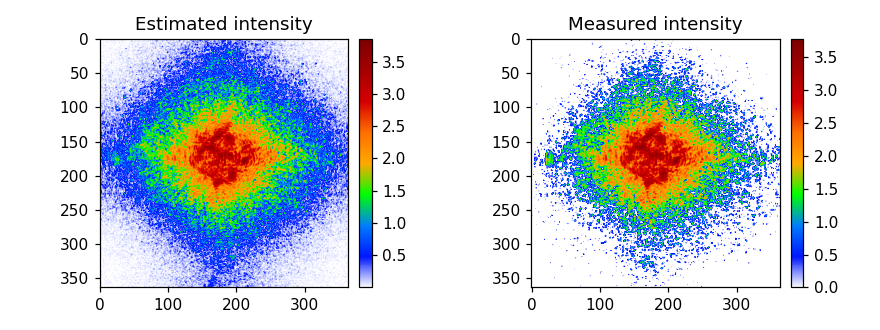

                                                                                                                       
iteration: 0                                                                                                           
error: 35.7                                                                                                            
estimated linear overlap: 75.0 %                                                                                       
estimated area overlap: 74.9 %                                                                                         
                                                                                                                       
iteration: 1                                                                                                           
error: 35.0                                                                                                            
estimated linear overlap: 75.0 %        

estimated linear overlap: 75.2 %                                                                                       
estimated area overlap: 74.6 %                                                                                         
                                                                                                                       
iteration: 14                                                                                                          
error: 33.6                                                                                                            
estimated linear overlap: 75.5 %                                                                                       
estimated area overlap: 75.2 %                                                                                         
                                                                                                                       
iteration: 15                           

iteration: 27                                                                                                          
error: 32.7                                                                                                            
estimated linear overlap: 75.3 %                                                                                       
estimated area overlap: 74.9 %                                                                                         
                                                                                                                       
iteration: 28                                                                                                          
error: 30.6                                                                                                            
estimated linear overlap: 74.6 %                                                                                       
estimated area overlap: 74.6 %          

estimated area overlap: 75.1 %                                                                                         
                                                                                                                       
iteration: 41                                                                                                          
error: 27.6                                                                                                            
estimated linear overlap: 75.1 %                                                                                       
estimated area overlap: 75.0 %                                                                                         
                                                                                                                       
iteration: 42                                                                                                          
error: 26.9                             

error: 25.1                                                                                                            
estimated linear overlap: 74.5 %                                                                                       
estimated area overlap: 73.7 %                                                                                         
                                                                                                                       
iteration: 55                                                                                                          
error: 24.2                                                                                                            
estimated linear overlap: 74.4 %                                                                                       
estimated area overlap: 73.8 %                                                                                         
                                        

                                                                                                                       
iteration: 68                                                                                                          
error: 23.0                                                                                                            
estimated linear overlap: 74.2 %                                                                                       
estimated area overlap: 73.8 %                                                                                         
                                                                                                                       
iteration: 69                                                                                                          
error: 23.6                                                                                                            
estimated linear overlap: 74.4 %        

estimated linear overlap: 74.2 %                                                                                       
estimated area overlap: 75.4 %                                                                                         
                                                                                                                       
iteration: 82                                                                                                          
error: 21.7                                                                                                            
estimated linear overlap: 74.3 %                                                                                       
estimated area overlap: 75.6 %                                                                                         
                                                                                                                       
iteration: 83                           

iteration: 95                                                                                                          
error: 21.5                                                                                                            
estimated linear overlap: 74.4 %                                                                                       
estimated area overlap: 75.3 %                                                                                         
                                                                                                                       
iteration: 96                                                                                                          
error: 21.1                                                                                                            
estimated linear overlap: 74.2 %                                                                                       
estimated area overlap: 75.2 %          

estimated area overlap: 75.5 %                                                                                         
                                                                                                                       
iteration: 109                                                                                                         
error: 20.1                                                                                                            
estimated linear overlap: 74.2 %                                                                                       
estimated area overlap: 75.4 %                                                                                         
                                                                                                                       
iteration: 110                                                                                                         
error: 20.1                             

error: 19.5                                                                                                            
estimated linear overlap: 74.0 %                                                                                       
estimated area overlap: 75.5 %                                                                                         
                                                                                                                       
iteration: 123                                                                                                         
error: 18.8                                                                                                            
estimated linear overlap: 73.9 %                                                                                       
estimated area overlap: 75.6 %                                                                                         
                                        

                                                                                                                       
iteration: 136                                                                                                         
error: 18.7                                                                                                            
estimated linear overlap: 74.1 %                                                                                       
estimated area overlap: 75.4 %                                                                                         
                                                                                                                       
iteration: 137                                                                                                         
error: 18.5                                                                                                            
estimated linear overlap: 74.0 %        

estimated linear overlap: 73.9 %                                                                                       
estimated area overlap: 75.6 %                                                                                         
                                                                                                                       
iteration: 150                                                                                                         
error: 17.9                                                                                                            
estimated linear overlap: 74.0 %                                                                                       
estimated area overlap: 75.4 %                                                                                         
                                                                                                                       
iteration: 151                          

iteration: 163                                                                                                         
error: 17.2                                                                                                            
estimated linear overlap: 74.0 %                                                                                       
estimated area overlap: 74.2 %                                                                                         
                                                                                                                       
iteration: 164                                                                                                         
error: 17.5                                                                                                            
estimated linear overlap: 74.1 %                                                                                       
estimated area overlap: 74.1 %          

estimated area overlap: 74.2 %                                                                                         
                                                                                                                       
iteration: 177                                                                                                         
error: 16.9                                                                                                            
estimated linear overlap: 73.9 %                                                                                       
estimated area overlap: 74.2 %                                                                                         
                                                                                                                       
iteration: 178                                                                                                         
error: 17.3                             

error: 16.4                                                                                                            
estimated linear overlap: 73.9 %                                                                                       
estimated area overlap: 74.2 %                                                                                         
                                                                                                                       
iteration: 191                                                                                                         
error: 16.4                                                                                                            
estimated linear overlap: 73.8 %                                                                                       
estimated area overlap: 74.4 %                                                                                         
                                        

In [9]:
# Now we switch to interferometric constraint, and the noise in object reconstruction is drastically cleaned up
params.intensityConstraint = 'interferometric'  
mPIE = Engines.mPIE(reconstruction, experimentalData, params, monitor)
mPIE.numIterations = 200
mPIE.betaProbe = 0.25
mPIE.betaObject = 0.25
mPIE.reconstruct()

In [9]:
## now save the data
# reconstruction.saveResults('reconstruction.hdf5')